# GTZAN_images_3_HOG_Demonstration
---

In [1]:
import numpy as np
import pandas as pd
import librosa
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import image
%matplotlib inline
from skimage import io
from skimage.feature import hog
from skimage.transform import rescale

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

In [2]:
genres = ['hiphop',
 'disco',
 'metal',
 'reggae',
 'jazz',
 'rock',
 'blues',
 'pop',
 'classical',
 'country']

In [3]:
# filename example: blues00000.png - blues00099.png (100 for each genre)
# numbers: 00000 - 00099
# format: png
# filename = {genre}+number+.png

# generate filenumbers (eg '00001.png')
numrange = range(0,100)
filenums = []

for num in numrange:
    if num < 10:
        filenums.append('0000'+str(num)+'.png')
    else:
        filenums.append('000'+str(num)+'.png')
        
print(filenums[:3], filenums[-3:])

['00000.png', '00001.png', '00002.png'] ['00097.png', '00098.png', '00099.png']


../gtzan/Data/images_original/blues/blues00001.png
dtype: uint8
shape: (288, 432, 4)
stats: 150.14877909593622 120.93155859653716 288
first row: [[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 ...
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]]
first row shape: (432, 4)


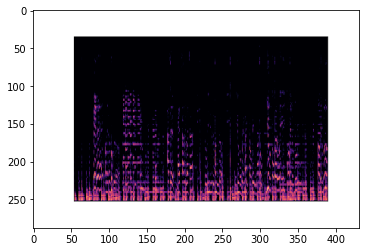

In [4]:
genre = 'blues'
filename = 'blues00001.png'
filepath = f'../gtzan/Data/images_original/{genre}/{filename}'

print(filepath)

# load image as pixel array
specgram = io.imread(filepath)

# summarize shape of the pixel array
print('dtype:', specgram.dtype)
print('shape:', specgram.shape)
print('stats:', specgram.mean(), specgram.std(), len(specgram))
print('first row:', specgram[0])
print('first row shape:', specgram[0].shape)

# display the array of pixels as an image
plt.imshow(specgram)
plt.show()

In [5]:
for i in range(50,60):
    print(i, specgram[50][i])

50 [255 255 255 255]
51 [255 255 255 255]
52 [255 255 255 255]
53 [255 255 255 255]
54 [  0   0   0 255]
55 [  0   0   4 255]
56 [  0   0   4 255]
57 [  0   0   4 255]
58 [  0   0   4 255]
59 [  0   0   4 255]


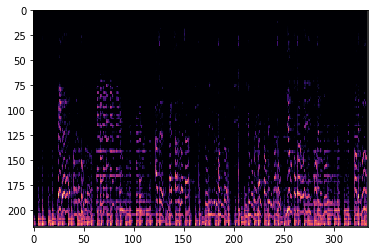

In [6]:
cropped = specgram[36:253,55:390]
plt.imshow(cropped)
plt.show()

In [7]:
from skimage.feature import hog
from skimage.transform import rescale

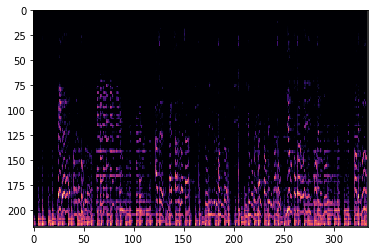

In [8]:
plt.imshow(cropped)

../gtzan/Data/images_original/blues/blues00001.png
dtype: float64
shape: (288, 432)
stats: 0.43766853695760705 0.47672490387489497 288
first row: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

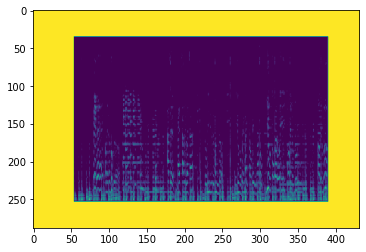

In [9]:
genre = 'blues'
filename = 'blues00001.png'
filepath = f'../gtzan/Data/images_original/{genre}/{filename}'

print(filepath)

# load image as pixel array
specgram_gray = io.imread(filepath, as_gray=True)

# summarize shape of the pixel array
print('dtype:', specgram_gray.dtype)
print('shape:', specgram_gray.shape)
print('stats:', specgram_gray.mean(), specgram_gray.std(), len(specgram_gray))
print('first row:', specgram_gray[0])
print('first row shape:', specgram_gray[0].shape)

# display the array of pixels as an image
plt.imshow(specgram_gray)
plt.show()

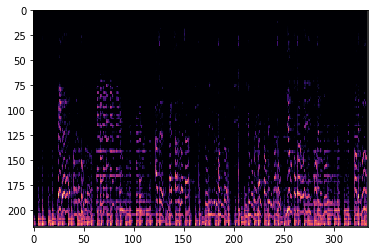

In [11]:
plt.imshow(cropped)
plt.show()

In [12]:
cropped_hog, cropped_hog_img = hog(
    image=cropped, pixels_per_cell=(9, 9),
    cells_per_block=(9,9),
    orientations=8,
    visualize=True,
    block_norm='L2-Hys', 
feature_vector=True)

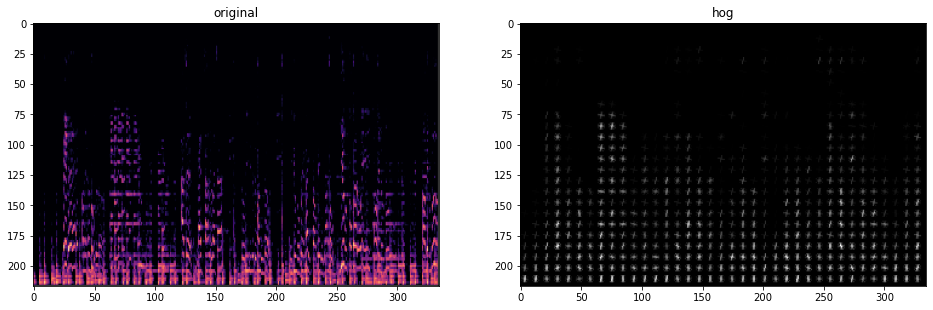

In [13]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
#fig.set_size_inches(8,6)
# remove ticks and their labels
# [a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
#     for a in ax]
 
ax[0].imshow(cropped, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(cropped_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

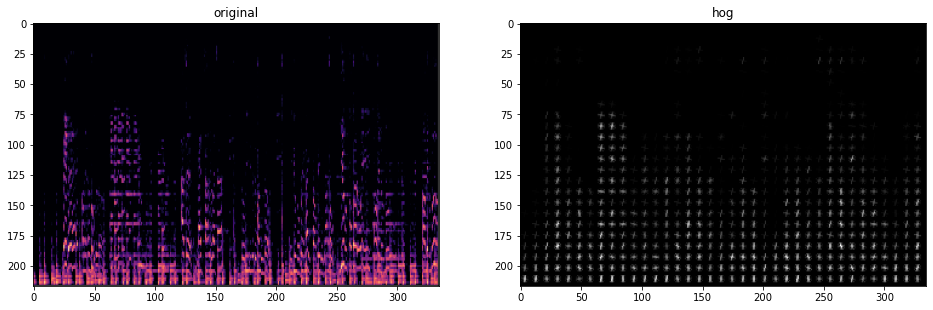

In [14]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
#fig.set_size_inches(8,6)
# remove ticks and their labels
# [a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
#     for a in ax]
 
ax[0].imshow(cropped, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(cropped_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [15]:
print('number of pixels:', cropped.shape[0] * cropped.shape[1])
print('number of hog features:', cropped_hog.shape)

number of pixels: 72695
number of hog features: (300672,)


In [16]:
type(cropped_hog)

numpy.ndarray

In [17]:
cropped.shape

(217, 335, 4)

In [18]:
cropped_hog.shape

(300672,)

../gtzan/panda_image.jpg
dtype: uint8
shape: (393, 590, 3)
first row shape: (590, 3)


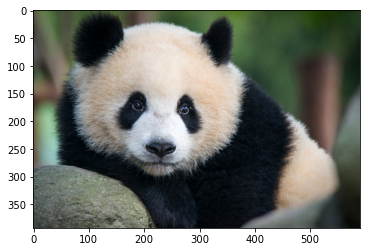

In [19]:
filepath = f'../gtzan/panda_image.jpg'

print(filepath)

# load image as pixel array
panda_orig = io.imread(filepath)

# summarize shape of the pixel array
print('dtype:', panda_orig.dtype)
print('shape:', panda_orig.shape)
print('first row shape:', panda_orig[0].shape)

# display the array of pixels as an image
plt.imshow(panda_orig)
plt.show()

In [20]:
panda_hog, panda_hog_img = hog(
    image=panda_orig, pixels_per_cell=(12, 12),
    cells_per_block=(2,2),
    orientations=8,
    visualize=True,
    block_norm='L2-Hys', 
feature_vector=True)

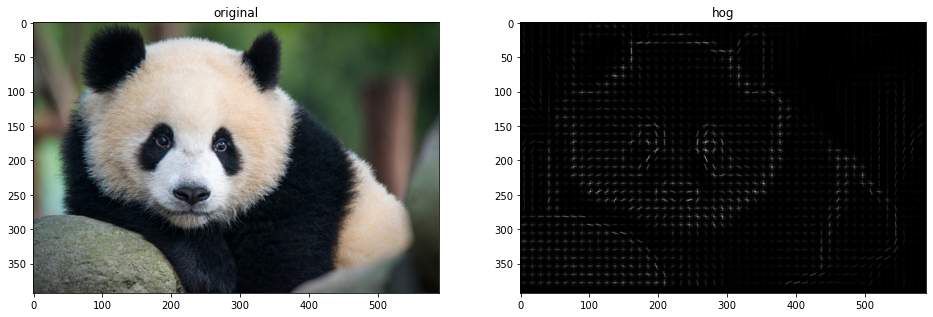

In [21]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
 
ax[0].imshow(panda_orig, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(panda_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [22]:
# "minmax scaling" to scale from original 0-255, to 0-1, for all RGB and intensity
cropped_std = cropped / 255
print(cropped_std.shape)
cropped_std

(217, 335, 4)


array([[[0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        ...,
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.2       , 0.2       , 0.2       , 1.        ]],

       [[0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        ...,
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.2       , 0.2       , 0.2       , 1.        ]],

       [[0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        ...,
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.      

In [23]:
# genre = 'blues'
# filename = 'blues00001.png'
# filepath = f'../gtzan/Data/images_original/{genre}/{filename}'

# print(filepath)


# # load image as pixel array
# specgram = image.imread(filepath)

# # summarize shape of the pixel array
# print('dtype:', specgram.dtype)
# print('shape:', specgram.shape)
# print('stats:', specgram.mean(), specgram.std(), len(specgram))
# print('first row:', specgram[0])
# print('first row shape:', specgram[0].shape)

# # display the array of pixels as an image
# plt.imshow(specgram)
# plt.show()

In [24]:
# # white border area
# print(specgram[10][10])

# # darker area (R,G,B, ?)
# print(specgram[100][250])

# # red area (R,G,B, ?)
# print(specgram[248][100])

In [25]:
# specgram.shape
# specgram.tofile('specgram.raw') # create raw file
# new_image_from_raw = np.fromfile('specgram.raw', dtype=np.uint8)
# new_image_from_raw.shape
# flattened = specgram.ravel(order='F')
# len(flattened)

In [26]:
# populate images_dict with filename and accompanying np array, representing the associated image
images_dict = {}

# cycle through genres list ('pop', 'blues', 'classical', etc) and file numbers ('00000.png', '00001.png' etc)
for genre in genres:
    for num in filenums:
        filepath = f'../gtzan/Data/images_original/{genre}/{genre}{num}'
        try:
            images_dict[f'{genre}{num}'] = io.imread(filepath)
        except:
            continue

In [27]:
# crop white borders out of each image and "standardize"
cropped_dict = {}

for genre in genres:
    for num in filenums:
        try: # jazz00054.png was missing. Could be others too. And "standardize" (divide 255)
            cropped_dict[genre+num] = images_dict[genre+num][36:253,55:390] / 255
        except:
            continue

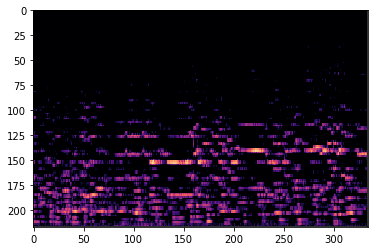

In [28]:
plt.imshow(cropped_dict['classical00001.png'])
plt.show()

In [29]:
cropped_hog, cropped_hog_img = hog(
    image=cropped_dict['classical00001.png'], pixels_per_cell=(9, 9),
    cells_per_block=(9,9),
    orientations=8,
    visualize=True,
    block_norm='L2-Hys', 
feature_vector=True)

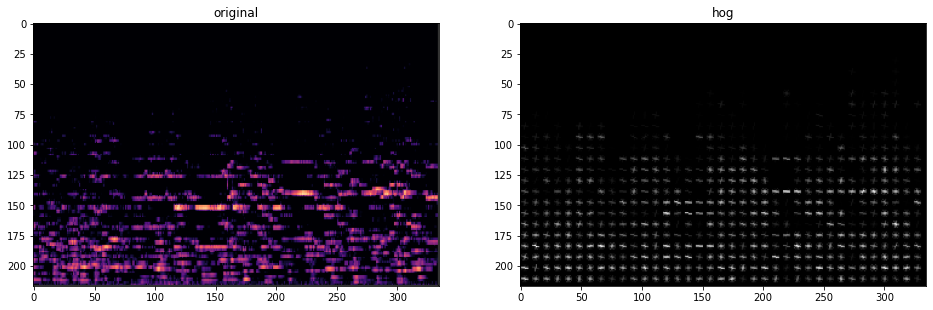

In [30]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
#fig.set_size_inches(8,6)
# remove ticks and their labels
# [a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
#     for a in ax]
 
ax[0].imshow(cropped_dict['classical00001.png'], cmap='gray')
ax[0].set_title('original')
ax[1].imshow(cropped_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [31]:
# function to return hog features
def hog_features(image):
    image_hog = hog(
    image=image, pixels_per_cell=(9, 9),
    cells_per_block=(9,9),
    orientations=8,
    visualize=False,
    block_norm='L2-Hys', feature_vector=True)
    
    return image_hog

In [32]:
# populate dict for hog features
hog_dict = {}

for genre in genres:
    for num in filenums:
        try: # jazz00054.png was missing. 
            hog_dict[genre+num] = hog_features(cropped_dict[genre+num])                
        except:
            continue

In [33]:
df = pd.DataFrame(hog_dict).T

print(df.shape)
display(df.head(3))
display(df.tail(3))

(999, 300672)


,0,1,2,3,4,5,6,7,8,9,...,300662,300663,300664,300665,300666,300667,300668,300669,300670,300671
hiphop00000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015842,0.070340,0.188144,0.048038,0.000000,0.010597,0.000978,0.000000,0.015964,0.095870
hiphop00001.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005581,0.026866,0.035208,0.024010,0.018557,0.121386,0.106771,0.039582,0.016341,0.006294
hiphop00002.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011563,0.016471,0.118507,0.010319,0.000000,0.017248,0.021631,0.013298,0.036422,0.038345


,0,1,2,3,4,5,6,7,8,9,...,300662,300663,300664,300665,300666,300667,300668,300669,300670,300671
country00097.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.002822,0.016803,0.005316,0.014399,0.058604,0.086368,0.001810,0.000621,0.011814
country00098.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025822,0.041378,0.020681,0.011221,0.031511,0.091036,0.091230,0.023984,0.019363,0.007478
country00099.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.063446,0.028464,0.096999,0.021878,0.028633,0.030582,0.020234,0.026922,0.038100,0.094237


In [34]:
# add column for label ('genre'), then slice filenumber off
df['genre'] = df.index
df['genre'] = df['genre'].apply(lambda x: x[:-9])

print(df.shape)
display(df.head(3))
display(df.tail(3))

(999, 300673)


,0,1,2,3,4,5,6,7,8,9,...,300663,300664,300665,300666,300667,300668,300669,300670,300671,genre
hiphop00000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.070340,0.188144,0.048038,0.000000,0.010597,0.000978,0.000000,0.015964,0.095870,hiphop
hiphop00001.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.026866,0.035208,0.024010,0.018557,0.121386,0.106771,0.039582,0.016341,0.006294,hiphop
hiphop00002.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016471,0.118507,0.010319,0.000000,0.017248,0.021631,0.013298,0.036422,0.038345,hiphop


,0,1,2,3,4,5,6,7,8,9,...,300663,300664,300665,300666,300667,300668,300669,300670,300671,genre
country00097.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002822,0.016803,0.005316,0.014399,0.058604,0.086368,0.001810,0.000621,0.011814,country
country00098.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041378,0.020681,0.011221,0.031511,0.091036,0.091230,0.023984,0.019363,0.007478,country
country00099.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028464,0.096999,0.021878,0.028633,0.030582,0.020234,0.026922,0.038100,0.094237,country
